# coolvel Stats

In this notebook we analyze some statistics from the coolvel muram2hanlert computation

In [1]:
import os
import os.path
import sys

In [2]:
sys.path.extend([os.path.expanduser("~/muram/python_codes"),
                 os.path.expanduser("~/hanlert/python"),
                 os.path.expanduser("~")])

In [3]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import shutil

import muram
import hanlert
import muram2hanlert

In [4]:
%matplotlib inline

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

In [7]:
os.getpid() # for checking memory/CPU in terminal

244542

## Analyze coolvel Jobs

In [8]:
jobroot = os.path.expanduser("~/scratch/muram2hanlert")
jobname = 'coolvel'
iteration = 16000

In [9]:
muram2hanlert.job_status(jobroot, jobname, iteration, 0, 0)

('OK', 639)

In [10]:
run_status = muram2hanlert.run_status(jobroot, jobname)

In [11]:
N = len(run_status[iteration])
print("N:", N)

N: 192


In [12]:
t_OK = []
p_OK = []
for (y, z), (status, t) in run_status[iteration].items():
    if status == "OK":
        t_OK.append(t)
        p_OK.append((y, z))
    else:
        print("Job at", (y, z), "has status", status, "in", t)
t_OK = np.array(t_OK)
p_OK = np.array(p_OK)
ix_sort = np.argsort(t_OK)
t_OK = t_OK[ix_sort]
p_OK = p_OK[ix_sort]
N_OK = t_OK.size
print(f"{N_OK} of {N} ({N_OK/N*100:0.2f}%) jobs finished OK")

192 of 192 (100.00%) jobs finished OK


median time: 11.217 minutes
median core-hours: 6.730 core-hours
total time: 46.000 hours
Core-hours: 1.656e+03 core-hours


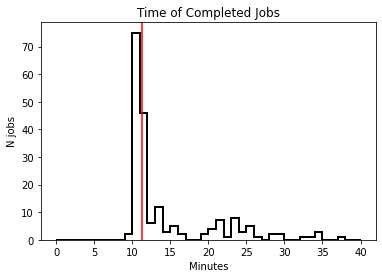

In [13]:
t_OK_med = np.median(t_OK / 60) # minutes
ch_med = t_OK_med / 60 * 36 # core-hours; used 36 cores per job
t_OK_sum = np.sum(t_OK / 3600) # hours
ch_sum = t_OK_sum * 36 # core-hours; used 36 cores per job

print(f"median time: {t_OK_med:0.3f} minutes")
print(f"median core-hours: {ch_med:0.3f} core-hours")
print(f"total time: {t_OK_sum:0.3f} hours")
print(f"Core-hours: {ch_sum:0.3e} core-hours")

fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(t_OK / 60., bins=np.arange(0, 41, 1), histtype='step', color='k', lw=2)
ax.axvline(t_OK_med, c='r')
ax.set_xlabel("Minutes")
ax.set_ylabel("N jobs")
ax.set_title("Time of Completed Jobs")
fig.savefig('coolvel_runhist.png')